## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

#tuning
from sklearn.model_selection import train_test_split,GridSearchCV

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#evaluation
from sklearn.metrics import f1_score,classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score

pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

## Load Data

In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/Marsh16/smoking-drinking-ALP-ML/main/smoking_drinking_data.csv")

In [3]:
df.head().T

,0,1,2,3,4
sex,Male,Male,Male,Male,Male
age,35,30,40,50,50
height,170,180,165,175,165
weight,75,80,75,80,60
waistline,90.0,89.0,91.0,91.0,80.0
sight_left,1.0,0.9,1.2,1.5,1.0
sight_right,1.0,1.2,1.5,1.2,1.2
hear_left,1.0,1.0,1.0,1.0,1.0
hear_right,1.0,1.0,1.0,1.0,1.0
SBP,120.0,130.0,120.0,145.0,138.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
df.duplicated().sum()

26

In [3]:
df = df.drop_duplicates()

## Preprocessing

In [4]:
df["sex"] = df["sex"].map({"Male": 0, "Female": 1})
df["DRK_YN"] = df["DRK_YN"].map({"Y": 1, "N": 0})

smk_stat_mapping = {1: 0, 2: 1, 3: 2}
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].map(smk_stat_mapping)


In [10]:
df.head().T

,0,1,2,3,4
sex,0.0,0.0,0.0,0.0,0.0
age,35.0,30.0,40.0,50.0,50.0
height,170.0,180.0,165.0,175.0,165.0
weight,75.0,80.0,75.0,80.0,60.0
waistline,90.0,89.0,91.0,91.0,80.0
sight_left,1.0,0.9,1.2,1.5,1.0
sight_right,1.0,1.2,1.5,1.2,1.2
hear_left,1.0,1.0,1.0,1.0,1.0
hear_right,1.0,1.0,1.0,1.0,1.0
SBP,120.0,130.0,120.0,145.0,138.0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,991320.0,0.468992,0.499038,0.0,0.0,0.0,1.0,1.0
age,991320.0,47.614529,14.181346,20.0,35.0,45.0,60.0,85.0
height,991320.0,162.240563,9.282922,130.0,155.0,160.0,170.0,190.0
weight,991320.0,63.283884,12.514101,25.0,55.0,60.0,70.0,140.0
waistline,991320.0,81.233255,11.850296,8.0,74.1,81.0,87.8,999.0
sight_left,991320.0,0.980833,0.605954,0.1,0.7,1.0,1.2,9.9
sight_right,991320.0,0.978428,0.604779,0.1,0.7,1.0,1.2,9.9
hear_left,991320.0,1.031495,0.174652,1.0,1.0,1.0,1.0,2.0
hear_right,991320.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991320.0,122.432360,14.543083,67.0,112.0,120.0,131.0,273.0


In [12]:
(df == 0).sum()

sex                 526399
age                      0
height                   0
weight                   0
waistline                0
sight_left               0
sight_right              0
hear_left                0
hear_right               0
SBP                      0
DBP                      0
BLDS                     0
tot_chole                0
HDL_chole                0
LDL_chole                0
triglyceride             0
hemoglobin               0
urine_protein            0
serum_creatinine         0
SGOT_AST                 0
SGOT_ALT                 0
gamma_GTP                0
SMK_stat_type_cd    602431
DRK_YN              495844
dtype: int64

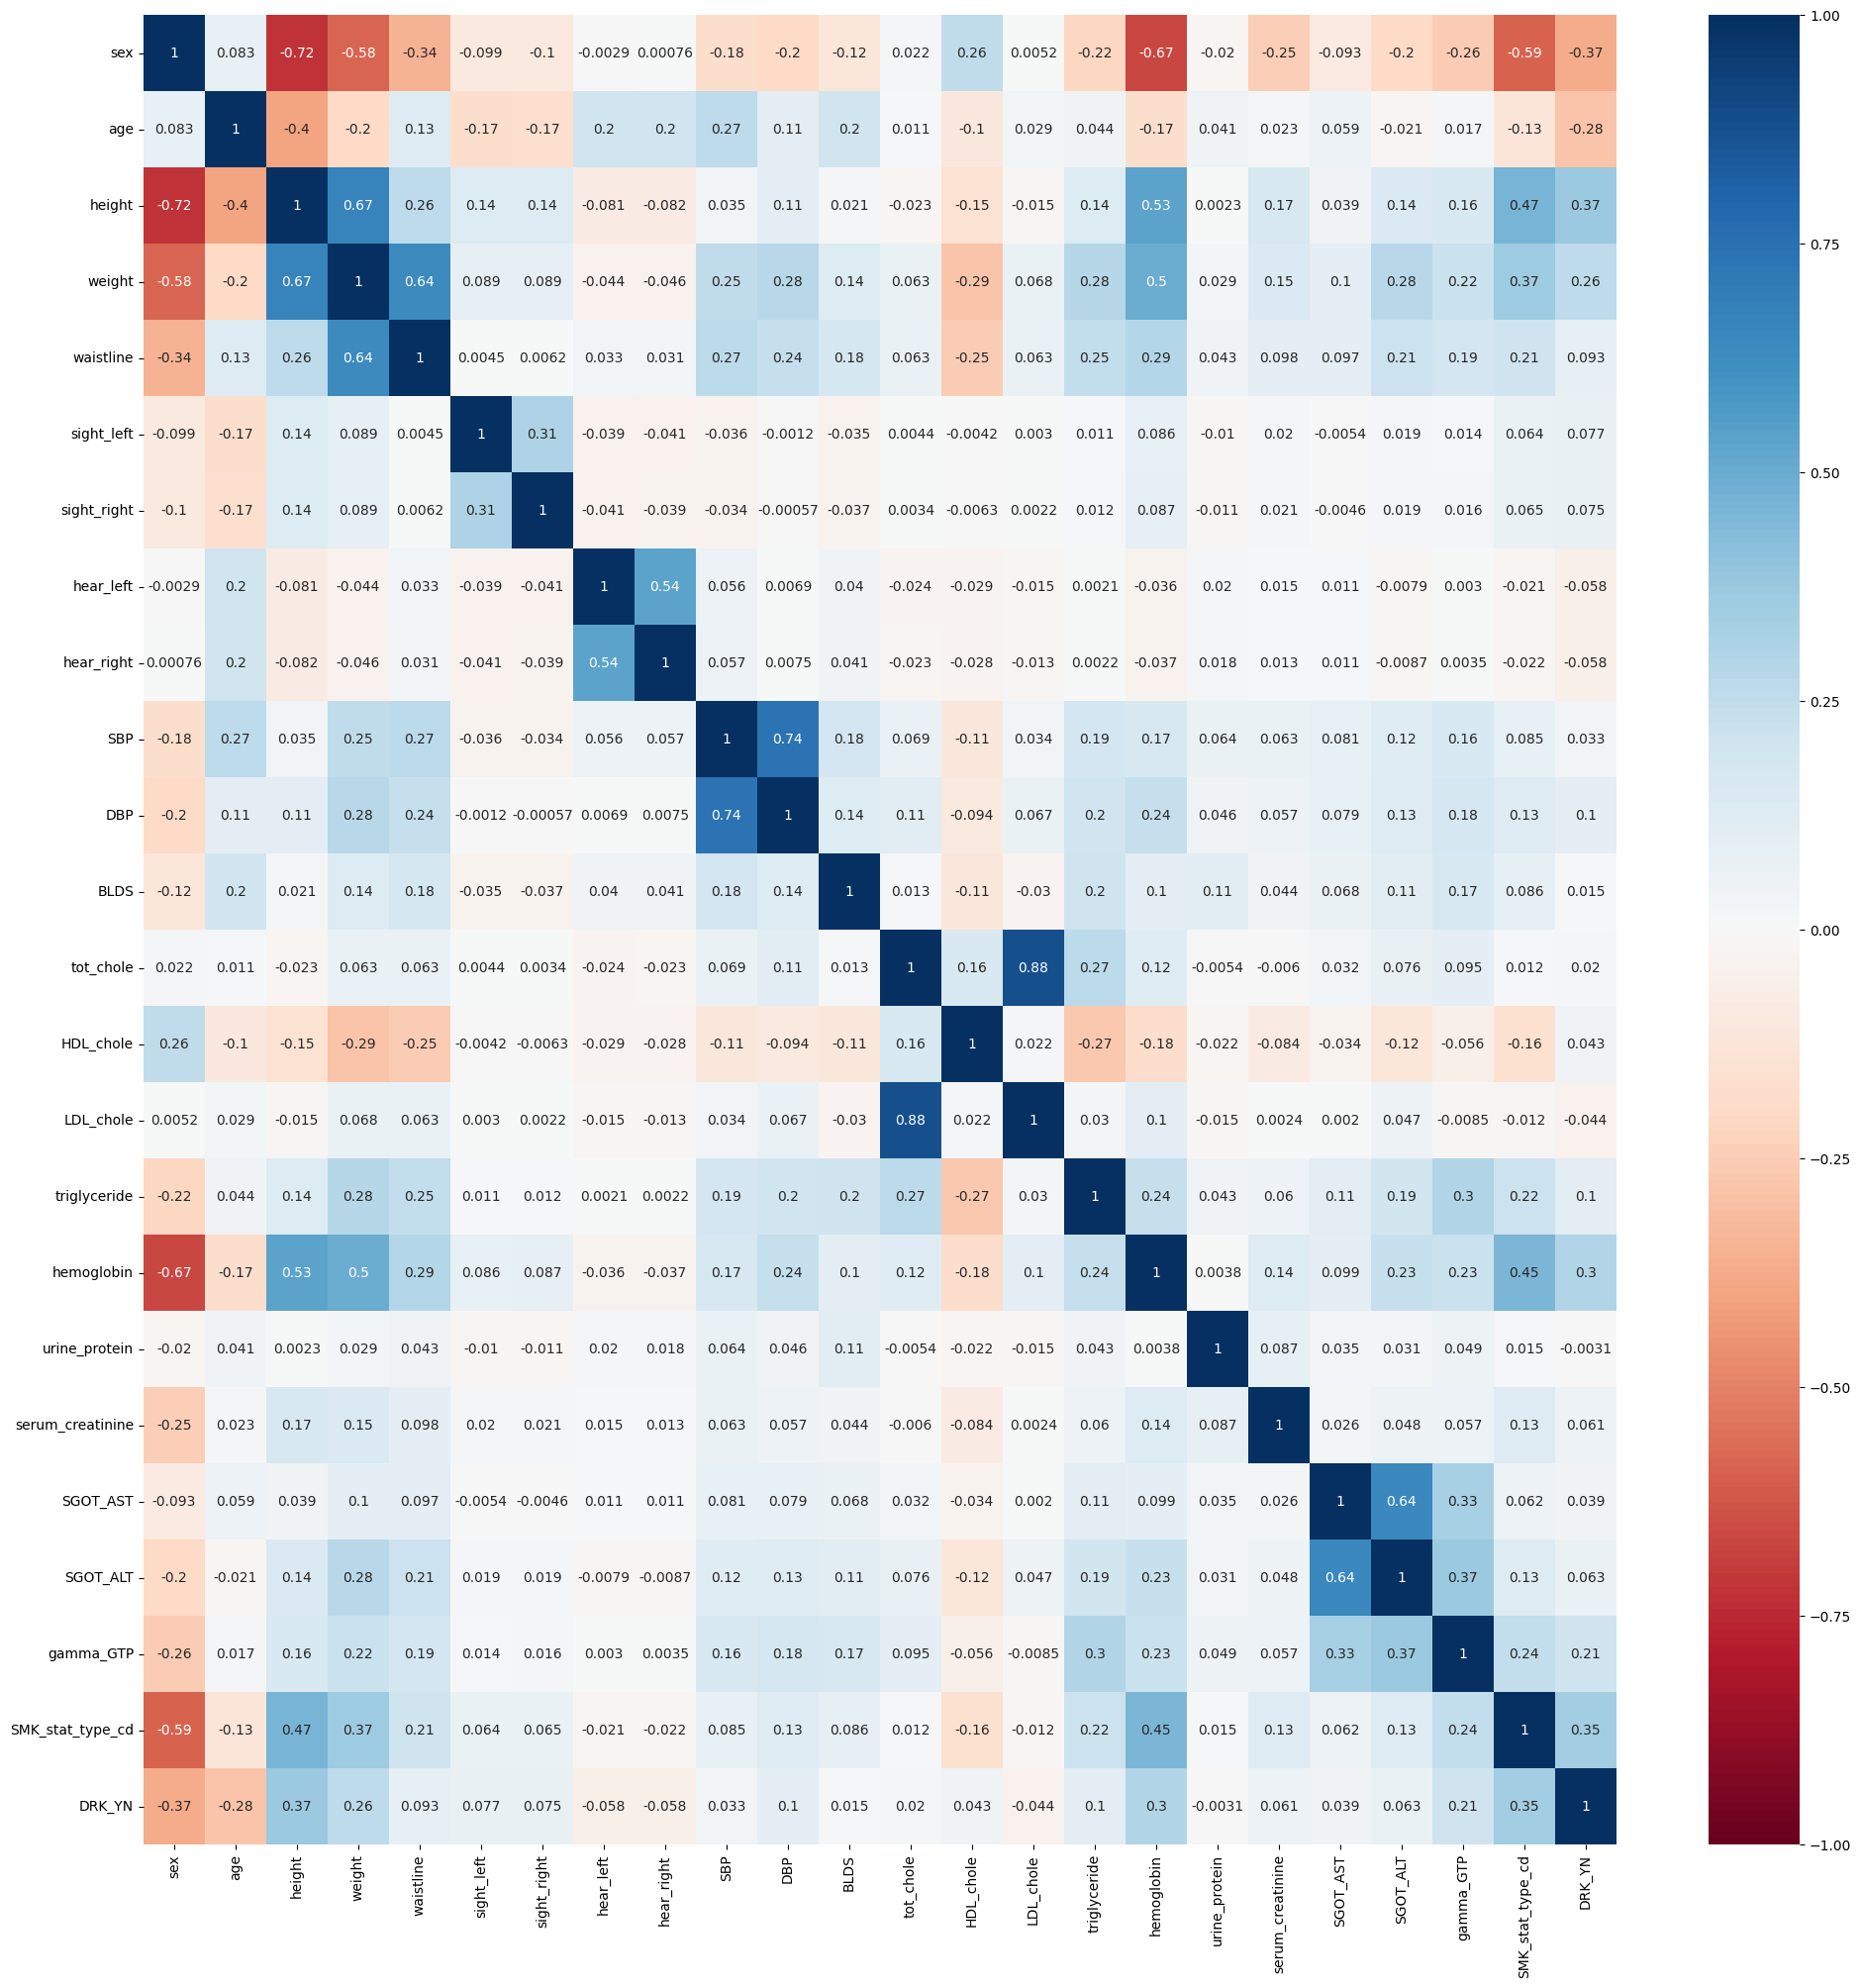

In [13]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

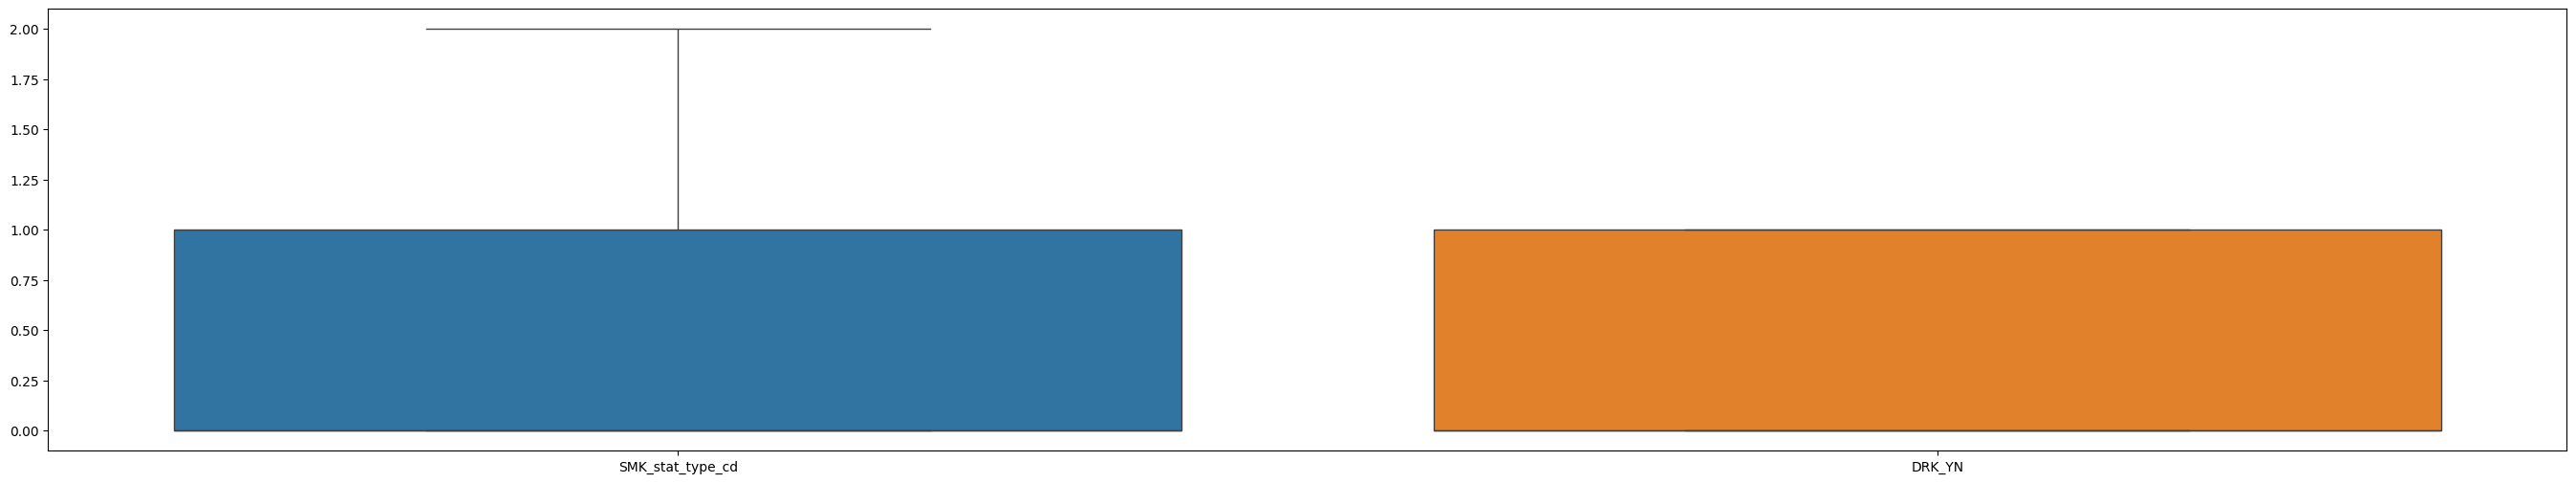

In [14]:
# Fit and transform the categorical data
plt.figure(figsize=(34, 6))
sns.boxplot(data=df[['SMK_stat_type_cd','DRK_YN']])
plt.show()

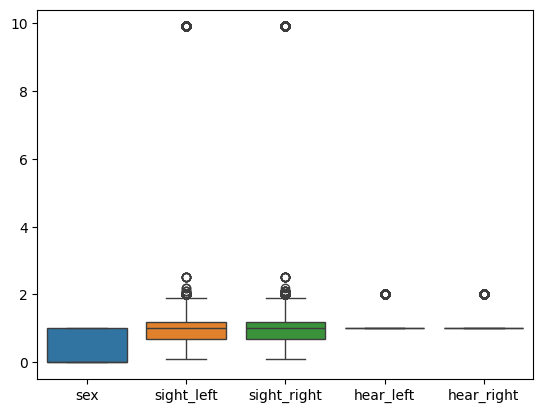

In [15]:
# Fit and transform the categorical data, sex	age	height	waistline	sight_left	sight_right	hear_left	hear_right	SBP	DBP	BLDS	tot_chole	HDL_chole	LDL_chole	urine_protein	serum_creatinine	SGOT_AST	SGOT_ALT	gamma_GTP
sns.boxplot(data=df[['sex','sight_left', 'sight_right', 'hear_left', 'hear_right' ]])
plt.show()

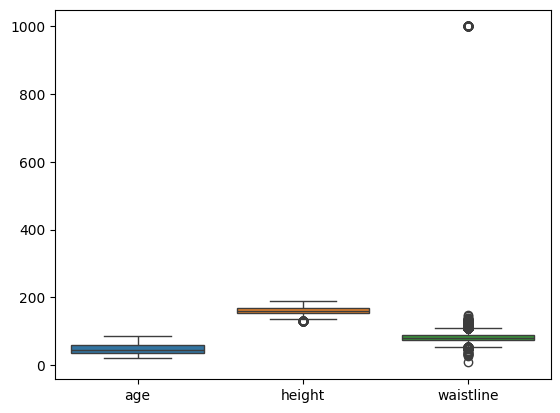

In [16]:
# Fit and transform the categorical data, sex	age	height	waistline	sight_left	sight_right	hear_left	hear_right	SBP	DBP	BLDS	tot_chole	HDL_chole	LDL_chole	urine_protein	serum_creatinine	SGOT_AST	SGOT_ALT	gamma_GTP
sns.boxplot(data=df[['age','height','waistline']])
plt.show()

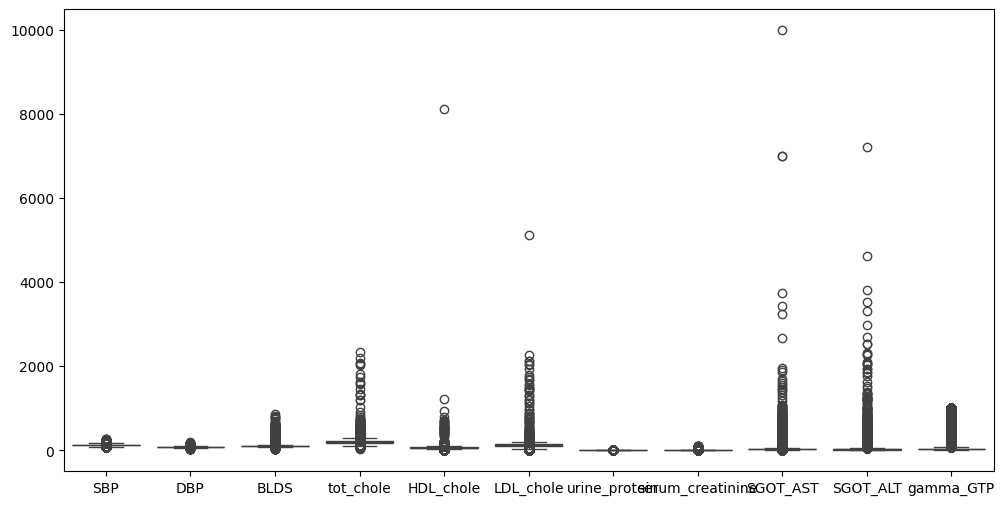

In [17]:
# Fit and transform the categorical data, sex	age	height	waistline	sight_left	sight_right	hear_left	hear_right	SBP	DBP	BLDS	tot_chole	HDL_chole	LDL_chole	urine_protein	serum_creatinine	SGOT_AST	SGOT_ALT	gamma_GTP
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['SBP',	'DBP',	'BLDS'	,'tot_chole','HDL_chole','LDL_chole',	'urine_protein'	,'serum_creatinine'	,'SGOT_AST',	'SGOT_ALT'	,'gamma_GTP' ]])
plt.show()

## Handling Outliers 

In [5]:
import numpy as np

def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    
    outliers = []
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > thres:
            outliers.append(i)
    
    return outliers

# Driver code
outliers = detect_outliers_zscore(df['waistline'])
mean_waistline = np.mean(df['waistline'])
df['waistline'] = np.where(df['waistline'].isin(outliers), mean_waistline, df['waistline'])

outliers8 = detect_outliers_zscore(df['tot_chole'])
mean_tot_chole = np.mean(df['tot_chole'])
df['tot_chole'] = np.where(df['tot_chole'].isin(outliers8), mean_tot_chole, df['tot_chole'])

outliers9 = detect_outliers_zscore(df['triglyceride'])
mean_triglyceride = np.mean(df['triglyceride'])
df['triglyceride'] = np.where(df['triglyceride'].isin(outliers9), mean_triglyceride, df['triglyceride'])

outliers1 = detect_outliers_zscore(df['BLDS'])
mean_BLDS = np.mean(df['BLDS'])
df['BLDS'] = np.where(df['BLDS'].isin(outliers1), mean_BLDS, df['BLDS'])

outliers2 = detect_outliers_zscore(df['HDL_chole'])
mean_HDL_chole = np.mean(df['HDL_chole'])
df['HDL_chole'] = np.where(df['HDL_chole'].isin(outliers2), mean_HDL_chole, df['HDL_chole'])

outliers3 = detect_outliers_zscore(df['LDL_chole'])
mean_LDL_chole = np.mean(df['LDL_chole'])
df['LDL_chole'] = np.where(df['LDL_chole'].isin(outliers3), mean_LDL_chole, df['LDL_chole'])

outliers4 = detect_outliers_zscore(df['serum_creatinine'])
mean_serum_creatinine = np.mean(df['serum_creatinine'])
df['serum_creatinine'] = np.where(df['serum_creatinine'].isin(outliers4), mean_serum_creatinine, df['serum_creatinine'])

outliers5 = detect_outliers_zscore(df['SGOT_AST'])
mean_SGOT_AST = np.mean(df['SGOT_AST'])
df['SGOT_AST'] = np.where(df['SGOT_AST'].isin(outliers5), mean_SGOT_AST, df['SGOT_AST'])

outliers6 = detect_outliers_zscore(df['SGOT_ALT'])
mean_SGOT_ALT = np.mean(df['SGOT_ALT'])
df['SGOT_ALT'] = np.where(df['SGOT_ALT'].isin(outliers6), mean_SGOT_ALT, df['SGOT_ALT'])

outliers7 = detect_outliers_zscore(df['gamma_GTP'])
mean_gamma_GTP = np.mean(df['gamma_GTP'])
df['gamma_GTP'] = np.where(df['gamma_GTP'].isin(outliers7), mean_gamma_GTP, df['gamma_GTP'])


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,991320.0,0.468992,0.499038,0.0,0.0,0.0,1.0,1.0
age,991320.0,47.614529,14.181346,20.0,35.0,45.0,60.0,85.0
height,991320.0,162.240563,9.282922,130.0,155.0,160.0,170.0,190.0
weight,991320.0,63.283884,12.514101,25.0,55.0,60.0,70.0,140.0
waistline,991320.0,81.158506,9.542791,48.0,74.1,81.0,87.6,116.7
sight_left,991320.0,0.980833,0.605954,0.1,0.7,1.0,1.2,9.9
sight_right,991320.0,0.978428,0.604779,0.1,0.7,1.0,1.2,9.9
hear_left,991320.0,1.031495,0.174652,1.0,1.0,1.0,1.0,2.0
hear_right,991320.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991320.0,122.432360,14.543083,67.0,112.0,120.0,131.0,273.0


## Remove unnesesary feature

In [6]:
df.drop(['weight', 'hemoglobin', 'triglyceride'], axis=1, inplace=True)

In [21]:
df_old = df

## Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = df.columns.difference(["DRK_YN", "SMK_stat_type_cd"])

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_dataset = df.copy()
scaled_dataset = scaled_dataset.reset_index(drop=True)  
scaled_dataset[columns_to_scale] = scaled_df

## Dataset before vs after scaling

In [23]:
df_old.head()

,sex,age,height,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,1.0,1.0,21.0,35.0,40.0,0,1
1,0,30,180,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,1.0,0.9,20.0,36.0,27.0,2,0
2,0,40,165,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,1.0,0.9,47.0,32.0,68.0,0,0
3,0,50,175,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,1.0,1.1,29.0,34.0,18.0,0,0
4,0,50,165,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,1.0,0.8,19.0,12.0,25.0,0,0


In [24]:
scaled_dataset.head()

,sex,age,height,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0.0,0.230769,0.666667,0.611354,0.091837,0.091837,0.0,0.0,0.257282,0.313725,0.485915,0.489177,0.411765,0.560748,0.0,0.409091,0.210526,0.330097,0.208556,0,1
1,0.0,0.153846,0.833333,0.596798,0.081633,0.112245,0.0,0.0,0.305825,0.326797,0.535211,0.640693,0.480392,0.663551,0.0,0.363636,0.200000,0.339806,0.139037,2,0
2,0.0,0.307692,0.583333,0.625910,0.112245,0.142857,0.0,0.0,0.257282,0.248366,0.478873,0.242424,0.343137,0.317757,0.0,0.363636,0.484211,0.300971,0.358289,0,0
3,0.0,0.461538,0.750000,0.625910,0.142857,0.112245,0.0,0.0,0.378641,0.359477,0.457746,0.523810,0.686275,0.457944,0.0,0.454545,0.294737,0.320388,0.090909,0,0
4,0.0,0.461538,0.583333,0.465793,0.091837,0.112245,0.0,0.0,0.344660,0.326797,0.500000,0.515152,0.539216,0.518692,0.0,0.318182,0.189474,0.106796,0.128342,0,0


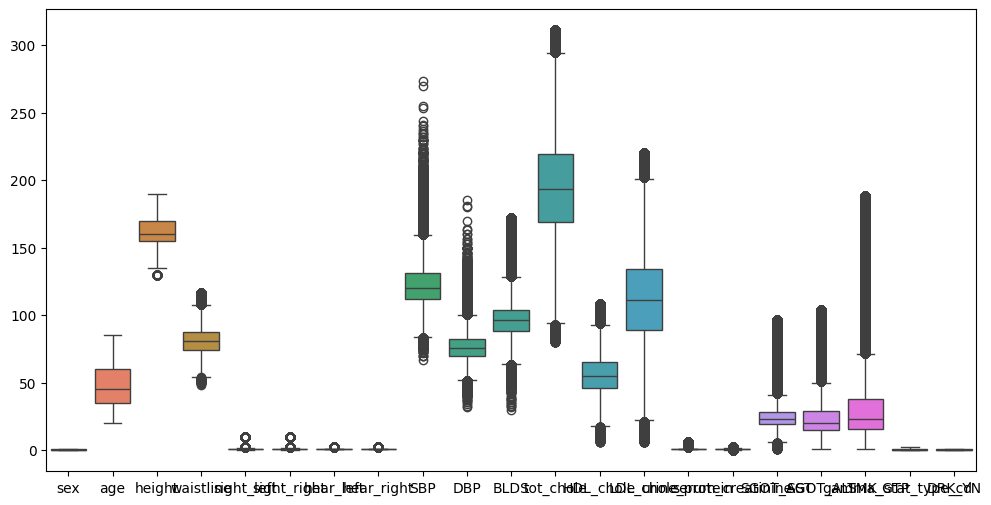

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_old)
plt.show()

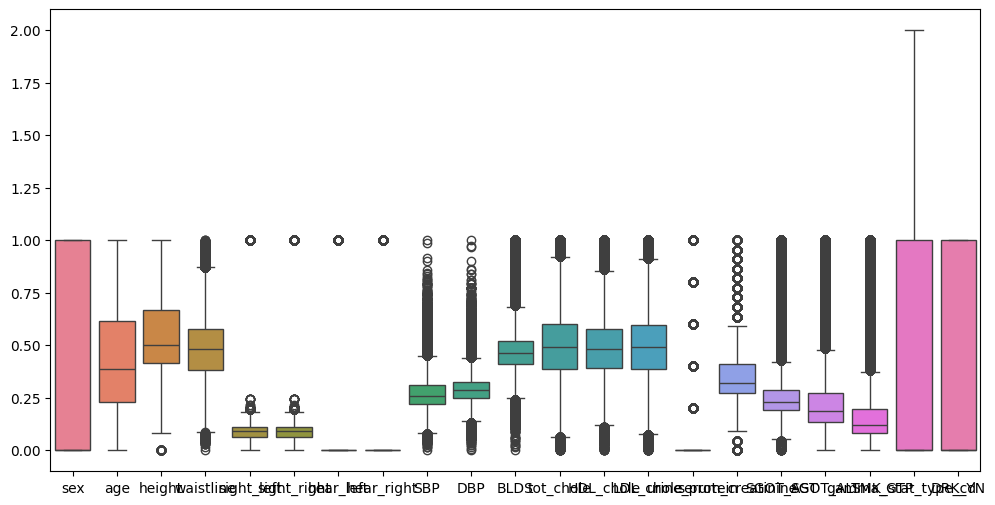

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_dataset)
plt.show()

## plot function for shorter code

In [27]:
def plot_roc_curve(y_true, y_prob, model_name):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} Model (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Model: Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

## Model Training and Evaluation

In [28]:
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
y = scaled_dataset["DRK_YN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drinking Model

## Decision tree

In [29]:
dt_classifier = DecisionTreeClassifier()
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train) 

print(f"Best parameters : {grid_search_dt.best_params_}")

Best parameters : {'criterion': 'entropy', 'max_depth': 10}


In [30]:
# Make y prediction based on X test
y_pred = grid_search_dt.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
857133,1,1
248820,0,0
903687,1,1
59866,0,0
192677,0,0
653964,1,1
487444,0,0
649623,0,1
14607,1,1
489530,1,1


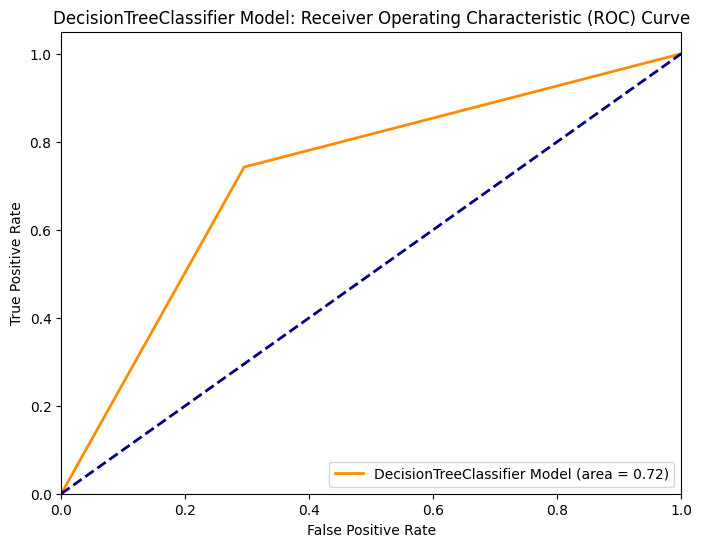

ROC AUC: 0.723743160368548


In [31]:
plot_roc_curve(y_test, y_pred, "DecisionTreeClassifier")
auc_roc_dt = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {auc_roc_dt}")

## RandomForestClassifier

In [32]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

n_iter = 5
rf_classifier = RandomForestClassifier(n_jobs=-1)
param_grid_rf = {"n_estimators": randint(100, 201), "max_depth": [20, 30],"min_samples_split": [2, 5, 10]}
grid_search_rf = RandomizedSearchCV(
        rf_classifier,
        param_distributions=param_grid_rf,
        n_iter=n_iter,
        cv=3,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42
    )
grid_search_rf.fit(X_train, y_train) 

print(f"Best parameters : {grid_search_rf.best_params_}")

Best parameters : {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 174}


In [33]:
# Make y prediction based on X test
y_pred = grid_search_rf.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
857133,1,1
248820,0,0
903687,1,1
59866,0,0
192677,0,0
653964,1,1
487444,0,0
649623,0,1
14607,1,1
489530,1,1


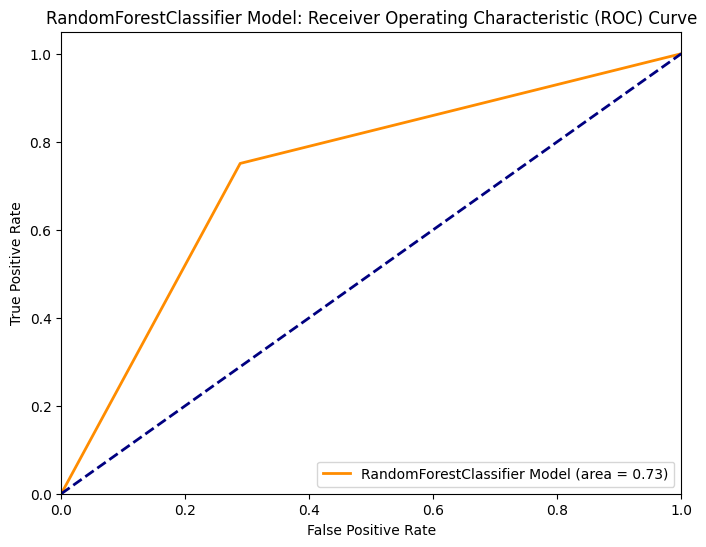

ROC AUC: 0.731049986669881


In [34]:
plot_roc_curve(y_test, y_pred, "RandomForestClassifier")
auc_roc_rf = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {auc_roc_rf}")

## KNeighborsClassifier

In [ ]:
knn_classifier = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [7], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train) 

print(f"Best parameters: {grid_search_knn.best_params_}")

In [37]:
from sklearn.model_selection import RandomizedSearchCV

n_iter = 5
knn_classifier = KNeighborsClassifier(n_jobs=-1)
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = RandomizedSearchCV(
        knn_classifier,
        param_distributions=param_grid_knn,
        n_iter=n_iter,
        cv=3,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42
    )
grid_search_knn.fit(X_train, y_train) 

print(f"Best parameters : {grid_search_knn.best_params_}")

Best parameters : {'weights': 'distance', 'n_neighbors': 7}


In [38]:
# Make y prediction based on X test
y_pred = grid_search_knn.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
857133,1,1
248820,0,0
903687,1,1
59866,0,0
192677,0,0
653964,1,1
487444,0,0
649623,0,1
14607,1,1
489530,1,1


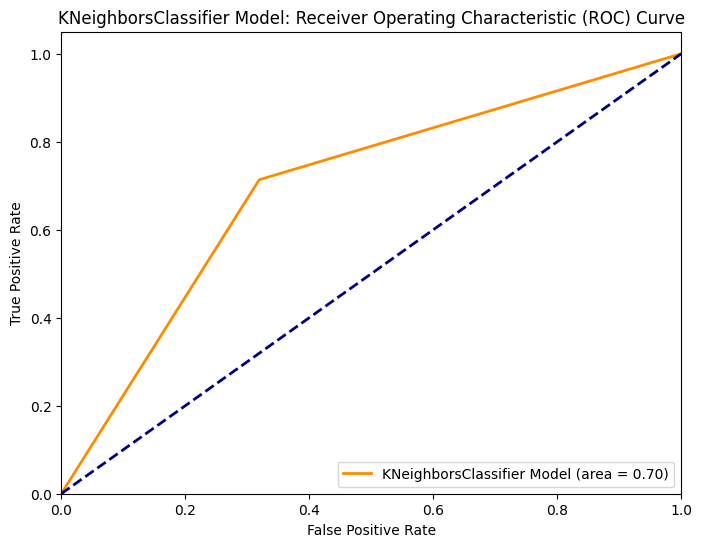

ROC AUC: 0.697179012583351


In [39]:
plot_roc_curve(y_test, y_pred, "KNeighborsClassifier")
auc_roc_knn = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {auc_roc_knn}")

## MLPClassifier

In [40]:
mlp_classifier = MLPClassifier()
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
grid_search_mlp = GridSearchCV(mlp_classifier, param_grid_mlp, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train) 
drinking_model=grid_search_mlp
print(f"Best parameters : {grid_search_mlp.best_params_}")

Best parameters : {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}


In [41]:
# Make y prediction based on X test
y_pred = grid_search_mlp.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
857133,1,1
248820,0,0
903687,1,1
59866,0,0
192677,0,0
653964,1,1
487444,0,0
649623,0,1
14607,1,1
489530,1,1


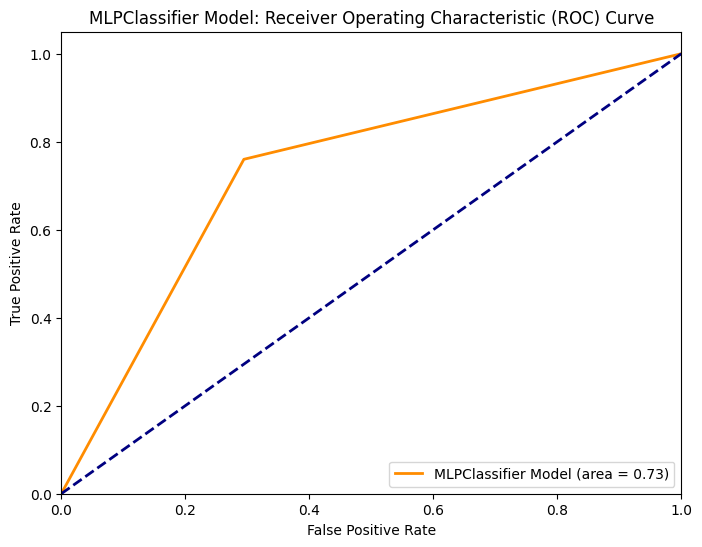

ROC AUC: 0.7327589978205763


In [42]:
plot_roc_curve(y_test, y_pred, "MLPClassifier")
auc_roc_mlp = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {auc_roc_mlp}")

## SVC

In [ ]:
svm_classifier = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train) 

# print(f"Best parameters : {grid_search_svm.best_params_}")

In [ ]:
plot_roc_curve(y_test, y_pred, "SVC")
auc_roc_svm = roc_auc_score(y_test, y_pred)
# print(f"ROC AUC: {auc_roc_svm}")

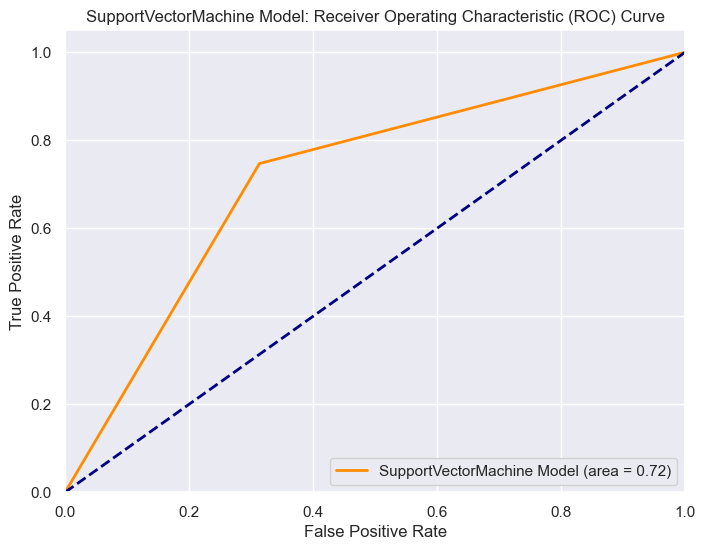

## plot function for shorter code

In [8]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc_curve(y_true, y_prob, model_name, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true, y_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Model Training and Evaluation

In [9]:
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
y = scaled_dataset["SMK_stat_type_cd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Smoking Model

## Decision Tree

In [11]:
dt_classifier = DecisionTreeClassifier()
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train) 

print(f"Best parameters : {grid_search_dt.best_params_}")

Best parameters : {'criterion': 'entropy', 'max_depth': 10}


In [12]:
# Make y prediction based on X test
y_pred = grid_search_dt.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
857133,2,2
248820,0,0
903687,2,2
59866,0,0
192677,0,0
653964,0,2
487444,0,0
649623,0,2
14607,0,1
489530,0,2


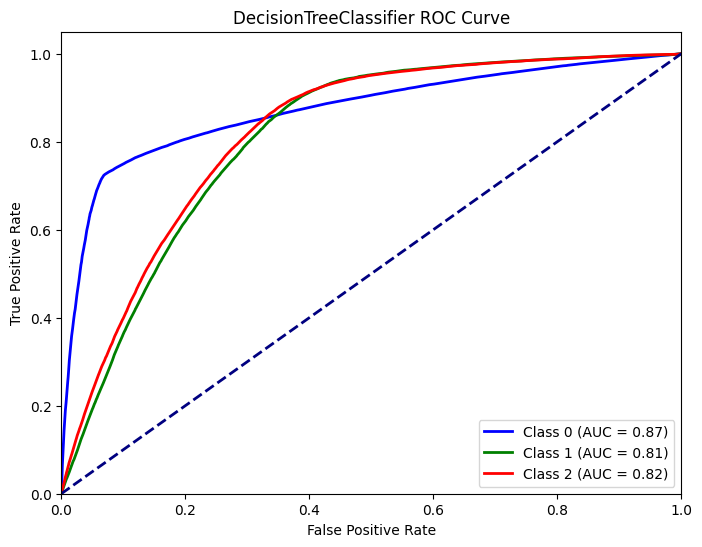

ROC AUC: 0.8345662280664733


In [16]:
plot_multiclass_roc_curve(y_test, grid_search_dt.predict_proba(X_test), "DecisionTreeClassifier", 3)
y_prob = grid_search_dt.predict_proba(X_test)
auc_roc_dt = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC: {auc_roc_dt}")

## RandomForestClassifier

In [18]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

n_iter = 5
rf_classifier = RandomForestClassifier(n_jobs=-1)
param_grid_rf = {"n_estimators": randint(100, 201), "max_depth": [20, 30],"min_samples_split": [2, 5, 10]}
grid_search_rf = RandomizedSearchCV(
        rf_classifier,
        param_distributions=param_grid_rf,
        n_iter=n_iter,
        cv=3,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42
    )
grid_search_rf.fit(X_train, y_train) 

print(f"Best parameters : {grid_search_rf.best_params_}")

Best parameters : {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 174}


In [19]:
# Make y prediction based on X test
y_pred = grid_search_rf.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
857133,2,2
248820,0,0
903687,2,2
59866,0,0
192677,0,0
653964,0,0
487444,0,0
649623,0,2
14607,0,2
489530,0,2


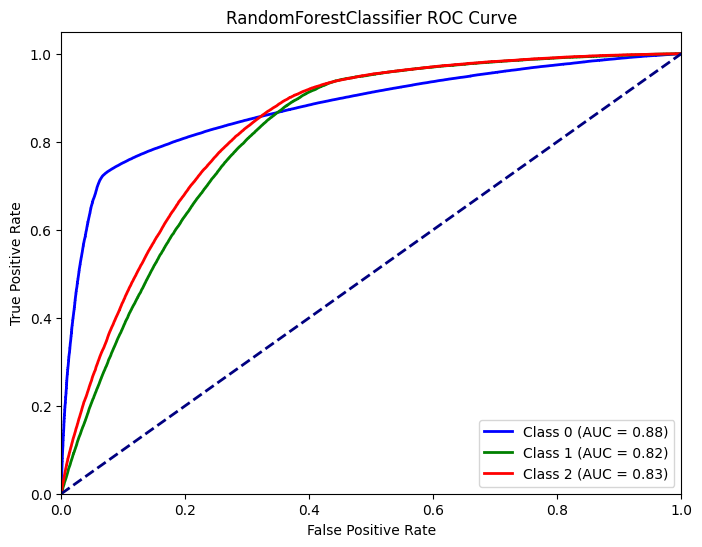

ROC AUC: 0.8419795350962919


In [20]:
plot_multiclass_roc_curve(y_test, grid_search_rf.predict_proba(X_test), "RandomForestClassifier", 3)
y_prob = grid_search_rf.predict_proba(X_test)
auc_roc_rf = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC: {auc_roc_rf}")

## KNeighborsClassifier

In [ ]:
knn_classifier = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train) 

print(f"Best parameters : {grid_search_rf.best_params_}")

In [22]:
from sklearn.model_selection import RandomizedSearchCV

n_iter = 5
knn_classifier = KNeighborsClassifier(n_jobs=-1)
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = RandomizedSearchCV(
        knn_classifier,
        param_distributions=param_grid_knn,
        n_iter=n_iter,
        cv=3,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42
    )
grid_search_knn.fit(X_train, y_train) 

print(f"Best parameters : {grid_search_knn.best_params_}")

Best parameters : {'weights': 'distance', 'n_neighbors': 7}


In [23]:
# Make y prediction based on X test
y_pred = grid_search_knn.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
857133,2,1
248820,0,0
903687,2,0
59866,0,0
192677,0,0
653964,0,2
487444,0,0
649623,0,0
14607,0,0
489530,0,2


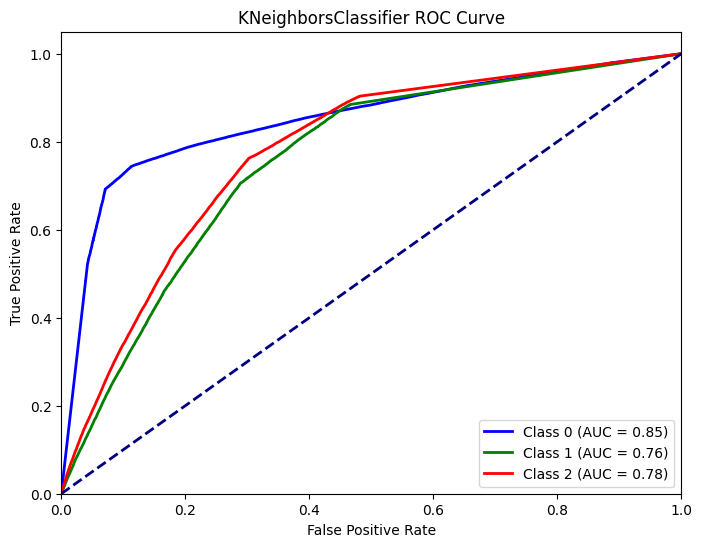

ROC AUC: 0.7943443371777675


In [24]:
plot_multiclass_roc_curve(y_test, grid_search_knn.predict_proba(X_test), "KNeighborsClassifier", 3)
y_prob = grid_search_knn.predict_proba(X_test)
auc_roc_knn = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC: {auc_roc_knn}")

## MLPClassifier

In [26]:
mlp_classifier = MLPClassifier()
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
grid_search_mlp = GridSearchCV(mlp_classifier, param_grid_mlp, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train) 
smoking_model=grid_search_mlp
print(f"Best parameters : {grid_search_mlp.best_params_}")

Best parameters : {'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}


In [27]:
# Make y prediction based on X test
y_pred = grid_search_mlp.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
857133,2,2
248820,0,0
903687,2,2
59866,0,0
192677,0,0
653964,0,0
487444,0,0
649623,0,0
14607,0,1
489530,0,0


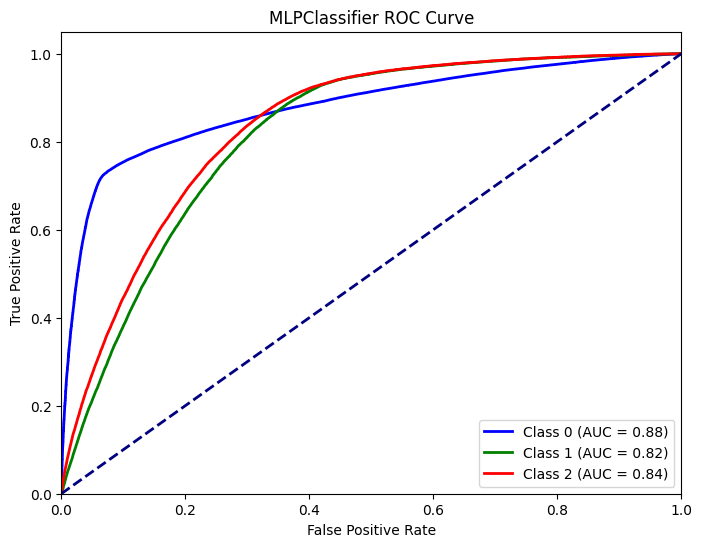

ROC AUC: 0.8442561360128709


In [28]:
plot_multiclass_roc_curve(y_test, grid_search_mlp.predict_proba(X_test), "MLPClassifier", 3)
y_prob = grid_search_mlp.predict_proba(X_test)
auc_roc_mlp = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC: {auc_roc_mlp}")

## SVC

In [ ]:
svm_classifier = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train) 

# print(f"Best parameters : {grid_search_svm.best_params_}")

In [ ]:
plot_multiclass_roc_curve(y_test, grid_search_svm.predict_proba(X_test), "svm", 3)
y_prob = grid_search_svm.predict_proba(X_test)
auc_roc_svm = roc_auc_score(y_test, y_prob, multi_class='ovr')
# print(f"ROC AUC: {auc_roc_svm}")

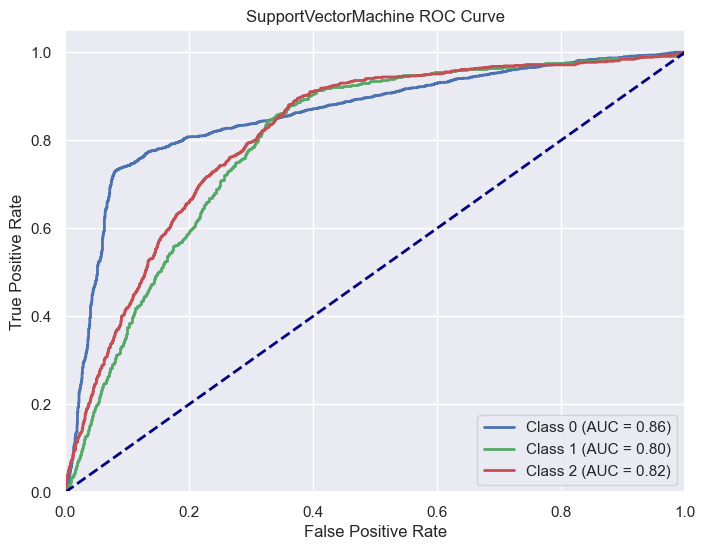

In [ ]:
expected_feature_names = [
    'sex', 'age', 'height', 'waistline', 'sight_left', 'sight_right',
    'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
    'LDL_chole', 'urine_protein', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

my_record = X_test.sample(n=1)[expected_feature_names]

print(my_record)

import json
json_data = my_record.to_json(orient='records', lines=True)
parsed_data = json.loads(json_data)
pretty_json = json.dumps(parsed_data, indent=4)
print(f"For input:\n{pretty_json}\n")

drinking_prediction = drinking_model.predict(my_record)
predicted_class_drinking = drinking_prediction[0]
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

smoking_prediction = smoking_model.predict(my_record)
predicted_class_smoking = smoking_model.classes_[smoking_prediction[0]]
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked) / 1 for Used to Smoke / 2 for Still Smoking)):\nPrediction: {predicted_class_smoking}")

       sex       age    height  waistline  sight_left  sight_right  hear_left  \
15342  0.0  0.692308  0.333333   0.429293    0.315789     0.315789        0.0   

       hear_right       SBP       DBP      BLDS  tot_chole  HDL_chole  \
15342         0.0  0.353846  0.354167  0.353591    0.37766   0.384615   

       LDL_chole  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
15342   0.377246            0.0               0.3  0.212291  0.092664   

       gamma_GTP  
15342   0.089249  
For input:
{
    "sex": 0.0,
    "age": 0.6923076923,
    "height": 0.3333333333,
    "waistline": 0.4292929293,
    "sight_left": 0.3157894737,
    "sight_right": 0.3157894737,
    "hear_left": 0.0,
    "hear_right": 0.0,
    "SBP": 0.3538461538,
    "DBP": 0.3541666667,
    "BLDS": 0.3535911602,
    "tot_chole": 0.3776595745,
    "HDL_chole": 0.3846153846,
    "LDL_chole": 0.377245509,
    "urine_protein": 0.0,
    "serum_creatinine": 0.3,
    "SGOT_AST": 0.2122905028,
    "SGOT_ALT": 0.0926640927,

## Feature Relevance

### Drinking Feature Relevance

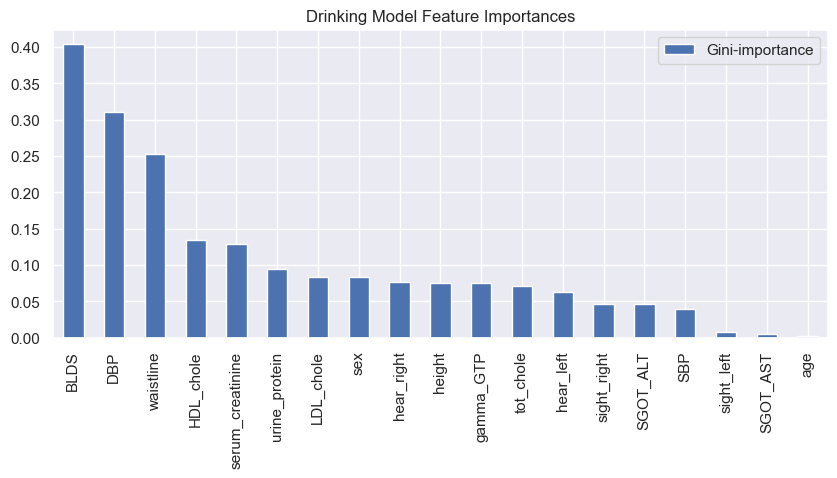

In [ ]:
feats = {}

# Access and collect feature importances for each individual classifier
for clf_name, clf in drinking_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):
        for feature, importance in zip(df.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
            if feature in feats:
                feats[feature] += importance
            else:
                feats[feature] = importance

                
                
importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar', rot=90, figsize=(10, 4))
plt.title('Drinking Model Feature Importances')
plt.show()


### Smoking Feature Relevance

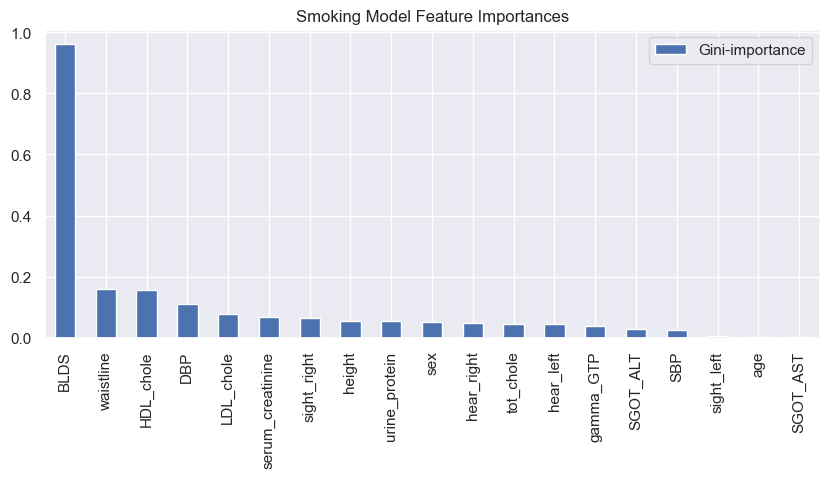

In [ ]:
feats = {}

# Access and collect feature importances for each individual classifier
for clf_name, clf in smoking_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):
        for feature, importance in zip(df.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
            if feature in feats:
                feats[feature] += importance
            else:
                feats[feature] = importance
             
importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar', rot=90, figsize=(10, 4))
plt.title('Smoking Model Feature Importances')
plt.show()

In [ ]:
import joblib

In [ ]:
# Save the drinking_model
joblib.dump(drinking_model, 'drinking_model.joblib')

# Save the smoking_model
joblib.dump(smoking_model, 'smoking_model.joblib')

['smoking_model.joblib']

In [ ]:
# Load the drinking_model
loaded_drinking_model = joblib.load('drinking_model.joblib')

# Load the smoking_model
loaded_smoking_model = joblib.load('smoking_model.joblib')

In [ ]:
drinking_prediction = loaded_drinking_model.predict(my_record)
predicted_class_drinking = drinking_prediction[0]
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

smoking_prediction = loaded_smoking_model.predict(my_record)
predicted_class_smoking = smoking_model.classes_[smoking_prediction[0]]
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked) / 1 for Used to Smoke / 2 for Still Smoking)):\nPrediction: {predicted_class_smoking}")


DRK_YN (1 for Yes / 0 for No):
Prediction: 0

SMK_stat_type_cd (Smoking Status 0 for Never Smoked) / 1 for Used to Smoke / 2 for Still Smoking)):
Prediction: 0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Recreate a similar model in Keras
input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

keras_model = Sequential([
    Dense(10, input_shape=(input_dim,), activation='relu'),
    Dense(output_dim, activation='softmax')
])

In [ ]:
for name, clf in drinking_model.named_estimators_.items():
    if name == 'NeuralNetworkClassifier':
        # For NeuralNetworkClassifier
        # Assuming the first layer has 10 units and the input_dim is 27
        keras_model.layers[0].set_weights([clf.coefs_[0][:, :10], np.zeros(10)])

keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
keras_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = keras_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

keras_model.save('drinking_model_keras.h5')


Epoch 1/10
400/400 [==============================] - 1s 1ms/step - loss: 0.8589 - accuracy: 0.6087 - val_loss: 0.7247 - val_accuracy: 0.6484
Epoch 2/10
400/400 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.6623 - val_loss: 0.6831 - val_accuracy: 0.6669
Epoch 3/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.6662 - val_loss: 0.6797 - val_accuracy: 0.6712
Epoch 4/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.6655 - val_loss: 0.6763 - val_accuracy: 0.6750
Epoch 5/10
400/400 [==============================] - 0s 990us/step - loss: 0.6822 - accuracy: 0.6700 - val_loss: 0.6737 - val_accuracy: 0.6766
Epoch 6/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.6720 - val_loss: 0.6720 - val_accuracy: 0.6787
Epoch 7/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6702 - val_loss: 0.6704 - val_accuracy: 0.6759
Epoc

c:\Users\AGIF\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
for name, clf in smoking_model.named_estimators_.items():
    if name == 'NeuralNetworkClassifier':
        # For NeuralNetworkClassifier
        # Assuming the first layer has 10 units and the input_dim is 27
        keras_model.layers[0].set_weights([clf.coefs_[0][:, :10], np.zeros(10)])

keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
keras_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = keras_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

keras_model.save('smoking_model_keras.h5')

Epoch 1/10
400/400 [==============================] - 1s 1ms/step - loss: 0.8326 - accuracy: 0.6175 - val_loss: 0.7248 - val_accuracy: 0.6444
Epoch 2/10
400/400 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.6460 - val_loss: 0.6932 - val_accuracy: 0.6647
Epoch 3/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.6567 - val_loss: 0.6805 - val_accuracy: 0.6656
Epoch 4/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.6606 - val_loss: 0.6765 - val_accuracy: 0.6675
Epoch 5/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.6658 - val_loss: 0.6736 - val_accuracy: 0.6741
Epoch 6/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6680 - val_loss: 0.6732 - val_accuracy: 0.6759
Epoch 7/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.6680 - val_loss: 0.6709 - val_accuracy: 0.6841
Epoch 

c:\Users\AGIF\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

loaded_model_drinking = load_model('drinking_model_keras.h5')
loaded_model_smoking = load_model('smoking_model_keras.h5')

In [ ]:
drinking_prediction = loaded_model_drinking.predict(my_record)
predicted_class_drinking = np.argmax(drinking_prediction)
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

smoking_prediction = loaded_smoking_model.predict(my_record)
predicted_class_smoking = np.argmax(smoking_prediction)
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked / 1 for Used to Smoke / 2 for Still Smoking)):\nPrediction: {predicted_class_smoking}")


1/1 [==============================] - 0s 123ms/step
DRK_YN (1 for Yes / 0 for No):
Prediction: 0

SMK_stat_type_cd (Smoking Status 0 for Never Smoked / 1 for Used to Smoke / 2 for Still Smoking)):
Prediction: 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

keras_model = load_model('drinking_model_keras.h5')  # Replace 'my_model.h5' with the actual filename

converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

with open('drinking_model_tf.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\AGIF\AppData\Local\Temp\tmpw6_p58my\assets


INFO:tensorflow:Assets written to: C:\Users\AGIF\AppData\Local\Temp\tmpw6_p58my\assets


In [ ]:
keras_model_smoking = load_model('smoking_model_keras.h5')  # Replace 'my_model.h5' with the actual filename

converter_smoke = tf.lite.TFLiteConverter.from_keras_model(keras_model_smoking)
tflite_model_smoke = converter_smoke.convert()

with open('smoking_model_tf.tflite', 'wb') as f:
    f.write(tflite_model_smoke)

INFO:tensorflow:Assets written to: C:\Users\AGIF\AppData\Local\Temp\tmp08iww5sb\assets


INFO:tensorflow:Assets written to: C:\Users\AGIF\AppData\Local\Temp\tmp08iww5sb\assets


In [ ]:
df.head()

,sex,age,height,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,1.0,1.0,21.0,35.0,40.0,0,1
1,1,30,180,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,1.0,0.9,20.0,36.0,27.0,2,0
2,1,40,165,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,1.0,0.9,47.0,32.0,68.0,0,0
3,1,50,175,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,1.0,1.1,29.0,34.0,18.0,0,0
4,1,50,165,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,1.0,0.8,19.0,12.0,25.0,0,0


In [ ]:
interpreter_drinking = tf.lite.Interpreter(model_path='drinking_model_tf.tflite')
interpreter_drinking.allocate_tensors()

interpreter_smoking = tf.lite.Interpreter(model_path='smoking_model_tf.tflite')
interpreter_smoking.allocate_tensors()

input_data = my_record.astype(np.float32)

interpreter_drinking.set_tensor(interpreter_drinking.get_input_details()[0]['index'], input_data)
interpreter_drinking.invoke()

drinking_output = interpreter_drinking.get_tensor(interpreter_drinking.get_output_details()[0]['index'])
predicted_class_drinking = np.argmax(drinking_output)
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

interpreter_smoking.set_tensor(interpreter_smoking.get_input_details()[0]['index'], input_data)
interpreter_smoking.invoke()

smoking_output = interpreter_smoking.get_tensor(interpreter_smoking.get_output_details()[0]['index'])
predicted_class_smoking = np.argmax(smoking_output)
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked / 1 for Used to Smoke / 2 for Still Smoking):\nPrediction: {predicted_class_smoking}")


DRK_YN (1 for Yes / 0 for No):
Prediction: 0

SMK_stat_type_cd (Smoking Status 0 for Never Smoked / 1 for Used to Smoke / 2 for Still Smoking):
Prediction: 0
